In [8]:
import sys
import os
import h5py
from collections import Counter
from progressbar import *
import re
import numpy as np

from repeating_classifier_training_utils import *

# Add the path to the parent directory to augment search for module
par_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))

if par_dir not in sys.path:
    sys.path.append(par_dir)
%load_ext autoreload
%matplotlib inline
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [23]:
tia_path = '/data/WatChMaL/data/Best_ResNet18_Model/'
dump_dir = '/home/cmacdonald/CNN/dumps/'
path = os.path.join(dump_dir,'20200713_094158')
npz_path = os.path.join(os.getcwd(),'Index_Storage')
LABEL_DICT = {0:"gamma", 1:"e", 2:"mu"}
softmax_index_dict = {value:key for key, value in LABEL_DICT.items()}

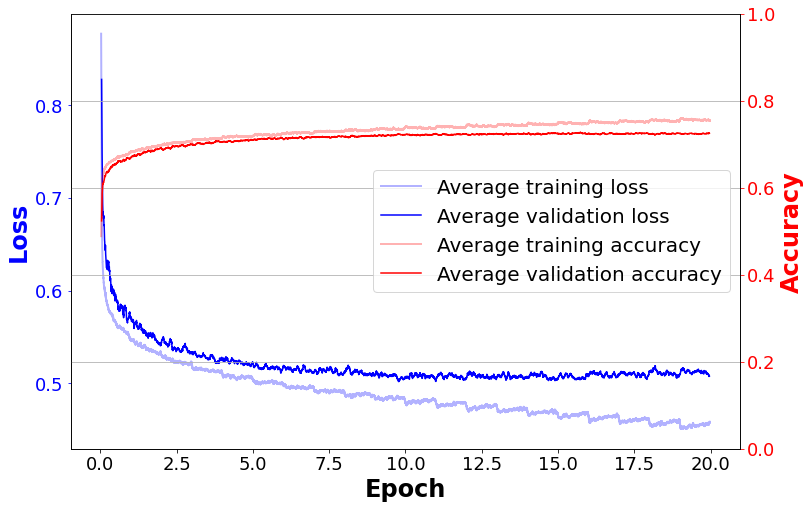

In [24]:
fig = disp_learn_hist_smoothed(path, leg_size=20)

In [25]:
test_output = load_test_output(os.path.join(path,'test_validation_iteration_dump.npz'),npz_path)

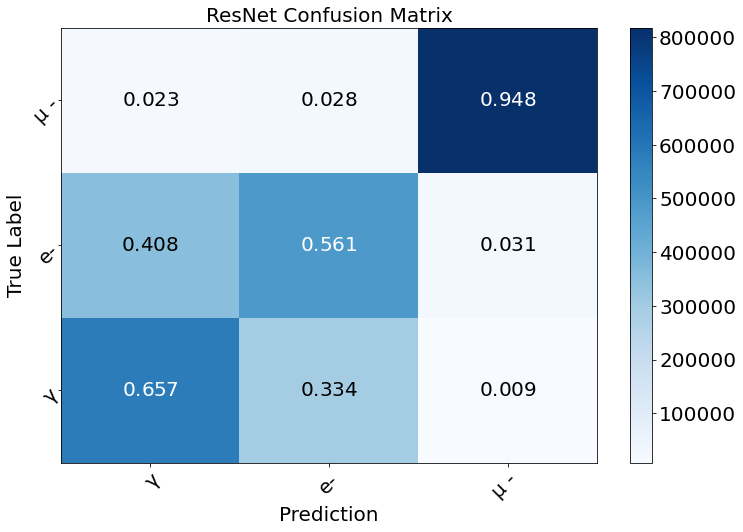

In [26]:
plot_confusion_matrix(test_output['filtered_labels'],test_output['filtered_predictions'],['\u03B3','e-','\u03BC -'],title='ResNet Confusion Matrix')

In [27]:
fprs, tprs, thresholds = prep_roc_data(test_output['filtered_softmaxes'],test_output['filtered_labels'],
                                'rejection',softmax_index_dict,"e","mu") 

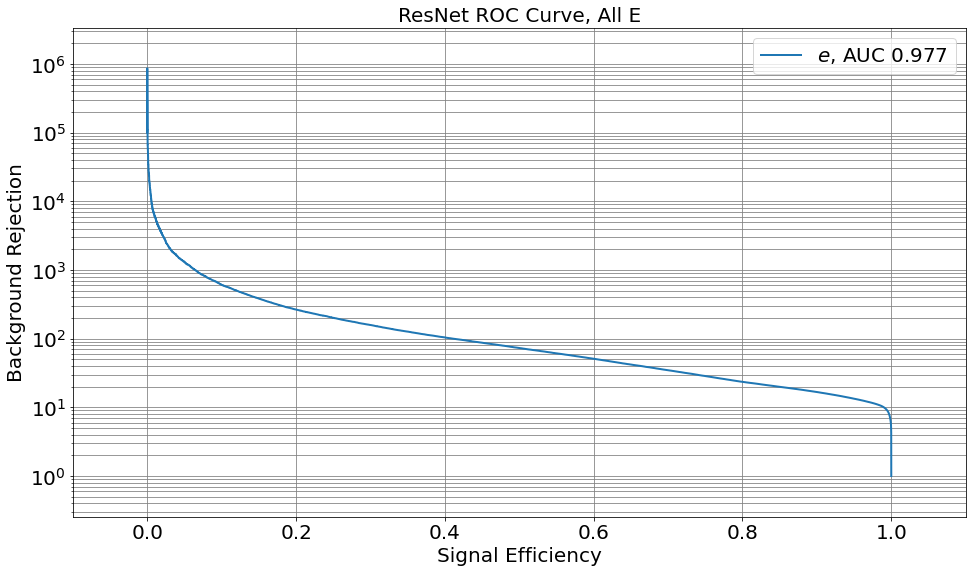

In [28]:
roc_metrics = plot_multiple_ROC(([fprs], [tprs], [thresholds]),'rejection', ["e", "mu"], 
                                png_name = None,title='ResNet ROC Curve, All E',annotate=False)